# Setup

In [1]:
import os
import tensorflow as tf
import torch
from utils.DataLoader import import_data
from matplotlib import patches, text, patheffects
from PIL import Image
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("\nNum GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CUDA Devices Available: ", torch.cuda.device_count())

2023-05-18 11:41:53.467692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



Num GPUs Available:  1
Num CUDA Devices Available:  0


In [40]:
import matplotlib.colors as mcolors


In [51]:
list(mcolors.BASE_COLORS.keys())

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

### Paths

In [2]:
# Specifying relevant paths
WORKING_DIRECTORY = os.getcwd()
TRAINING_FOLDER = os.path.join(WORKING_DIRECTORY, 'dependencies', 'yolov5','datasets', 'training')
IMAGES = os.path.join(TRAINING_FOLDER, 'images')
LABELS = os.path.join(TRAINING_FOLDER, 'labels')
DATA = os.path.join(TRAINING_FOLDER, 'data')

data = import_data(DATA, 'train.json')


### Install any requirements

In [3]:
# Changing directory
os.chdir('dependencies/yolov5/')

!pip install -r requirements.txt

# Image Visualizations

In [4]:
# Fetching images along with complete path
images = [(os.path.join(IMAGES, img), img) for img in os.listdir(IMAGES) if '.jpg' in img]

In [32]:
# Creating DataFrames to extract relevant image information
images_df = pd.DataFrame(data.images)
annot_df = pd.DataFrame(data.annotations)
categories = {cat['id']:cat['name'] for cat in data.catagories}

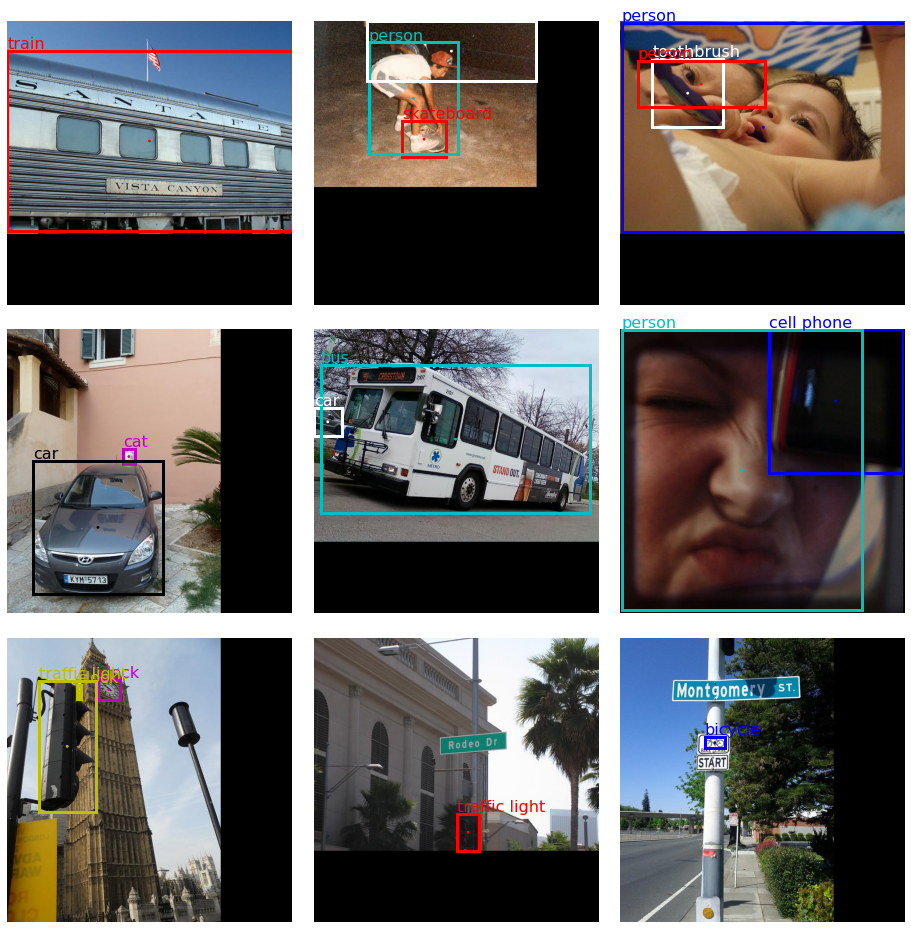

In [52]:
# Visualizing Images
fig, axs = plt.subplots(3, 3, figsize=(13, 13))

for ax in axs.flatten():
    
    # Choose random image
    ind = random.randint(0, len(images)-1)
    
    # Extract img and path from images
    path, img = images[ind]
    
    # Generating image plot
    image = Image.open(path)
    
    # Extracting image id to link to annotations
    img_id = images_df[images_df.file_name == img].id.unique()[0]
    
    # Extracting bbox's
    boxes = np.array(annot_df[annot_df.image_id == img_id].bbox.to_list())
    
    # Gettin category id's
    category_ids = np.array(annot_df[annot_df.image_id == img_id].category_id.to_list())
    
    # Cropping image to regular size
    x, y = images_df[images_df.id == img_id][['height', 'width']].values[0]
    
    # Visualizing image on axis
    ax.imshow(image)
    
    # Removing axis
    ax.axis('off')
    
    # Looping through every bbox
    for box, cat in zip(boxes, category_ids):
        # Randomize color
        col = random.choice(list(mcolors.BASE_COLORS.keys()))
        
        center_x = box[0] + box[2] / 2  # calculate the center x coordinate
        center_y = box[1] + box[3] / 2  # calculate the center y coordinate
        
        # Adding patch
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=3, edgecolor=col, facecolor='none')
        
        # Adding dot in the middle of circle
        circ = patches.Circle((center_x, center_y),radius=2, color=col)
        
        # Add pathches to image
        ax.add_patch(rect)
        ax.add_patch(circ)
        
        # Adding category to image
        ax.text(box[0], box[1]-5, f'{categories[cat]}', fontsize=16, color=col)


    
plt.tight_layout()
plt.show()

    

# YOLv5 Training

**img**: Image Size

**batch**: batch size

**epochs**: 200

**data**: yaml file containing paths etc. for where data is store

**weights**: Using transferred learning from yolo's pre-trained model

**cfg**: Model config

**cache**: Cache label and images

**project**: Project name (created directory)

**name**: Name of custom trained model

In [5]:
!python train.py --img 640 --batch 32 --epochs 150 --data 'data/custom_data.yaml' --weights yolov5s.pt --cfg 'models/yolov5s.yaml' --cache --project exam --name custom_trained_yolo

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=exam, name=custom_trained_yolo, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0